In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from PCA_FDA.my_PCA import My_PCA

In [2]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, resize=0.8)

In [3]:
face_data = lfw_people['data']
face_images = lfw_people['images']
face_tnames = lfw_people['target_names']
face_targets = lfw_people['target']

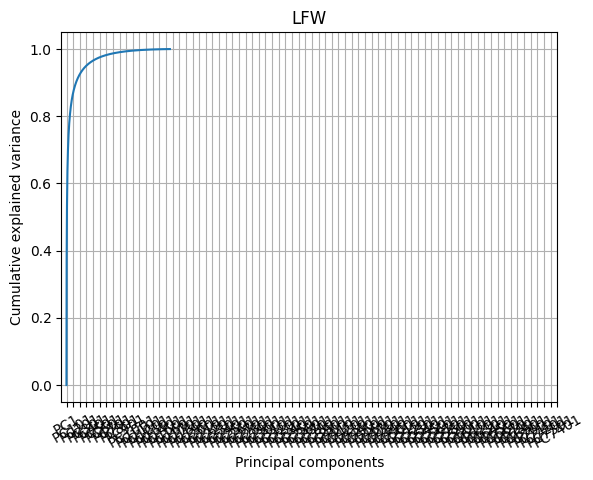

In [4]:
# Inizializzazione oggetto PCA
pca_global = PCA()
# "Fit" dell'oggetto PCA
pca_global.fit(face_data)

# Definizione di un array della varianza spiegata percentuale CUMULATIVA
expld_variance_global = np.insert(np.cumsum(pca_global.explained_variance_ratio_), 0, 0)

plt.figure()
plt.plot(expld_variance_global)
plt.title('LFW')
plt.xticks(ticks=np.arange(1, pca_global.n_features_ + 1, 100),
           labels=[f'PC{i}' for i in range(1, pca_global.n_features_ + 1, 100)],
           rotation=30)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

In [5]:
pca_global.explained_variance_ratio_.shape

(1560,)

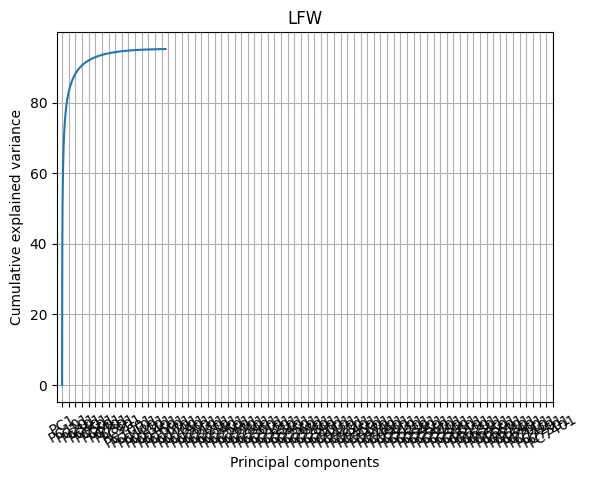

In [6]:
pca_code = My_PCA()
pca_code.fit_transform(face_data)

# Definizione di un array della varianza spiegata percentuale CUMULATIVA
expld_variance_global = np.insert(np.cumsum([(pca_code.s[i]**2)/(face_data.shape[1] - 1) for i in range(pca_code.s.shape[0])]), 0, 0)

plt.figure()
plt.plot(expld_variance_global)
plt.title('LFW')
plt.xticks(ticks=np.arange(1, pca_code.n_components + 1, 100),
           labels=[f'PC{i}' for i in range(1, pca_code.n_components + 1, 100)],
           rotation=30)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

In [7]:
pca_percentage = 0.95

pca = PCA(pca_percentage)
pca.fit(face_data)

print('Numero PC: {}'.format(pca.n_components_))
print('% Varianza Tot. Spiegata: {}'.format(pca.explained_variance_ratio_.sum()))

Numero PC: 298
% Varianza Tot. Spiegata: 0.9500707387924194


In [8]:
face_data.shape

(1560, 7500)

vmin: -0.08275769650936127 (dark purple)
vmax: 0.08275769650936127 (yellow)


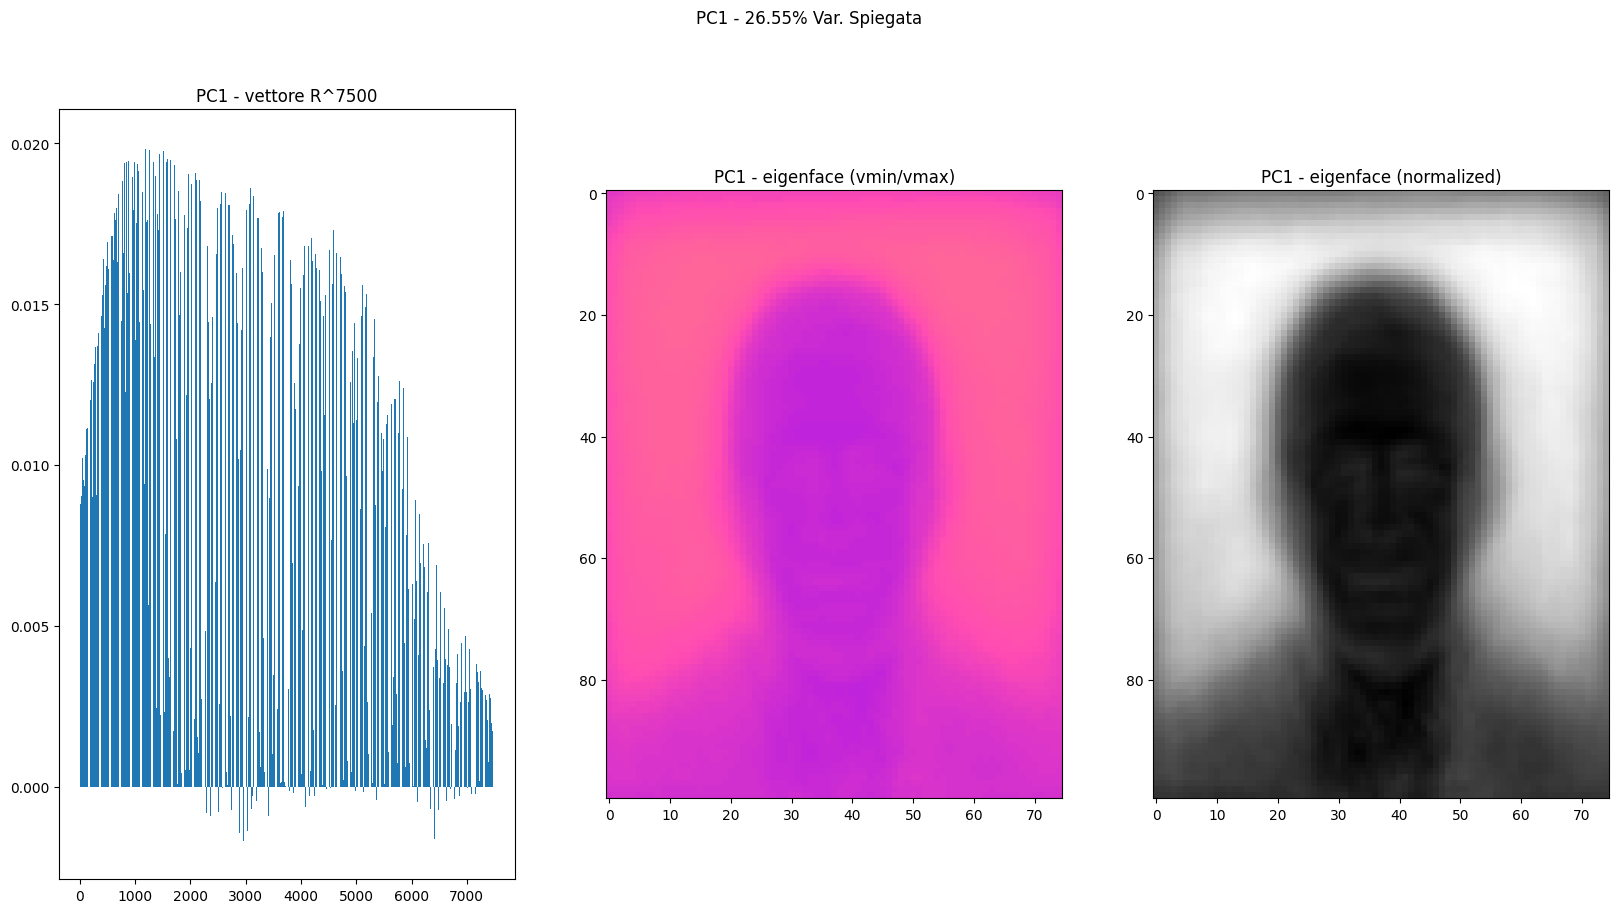

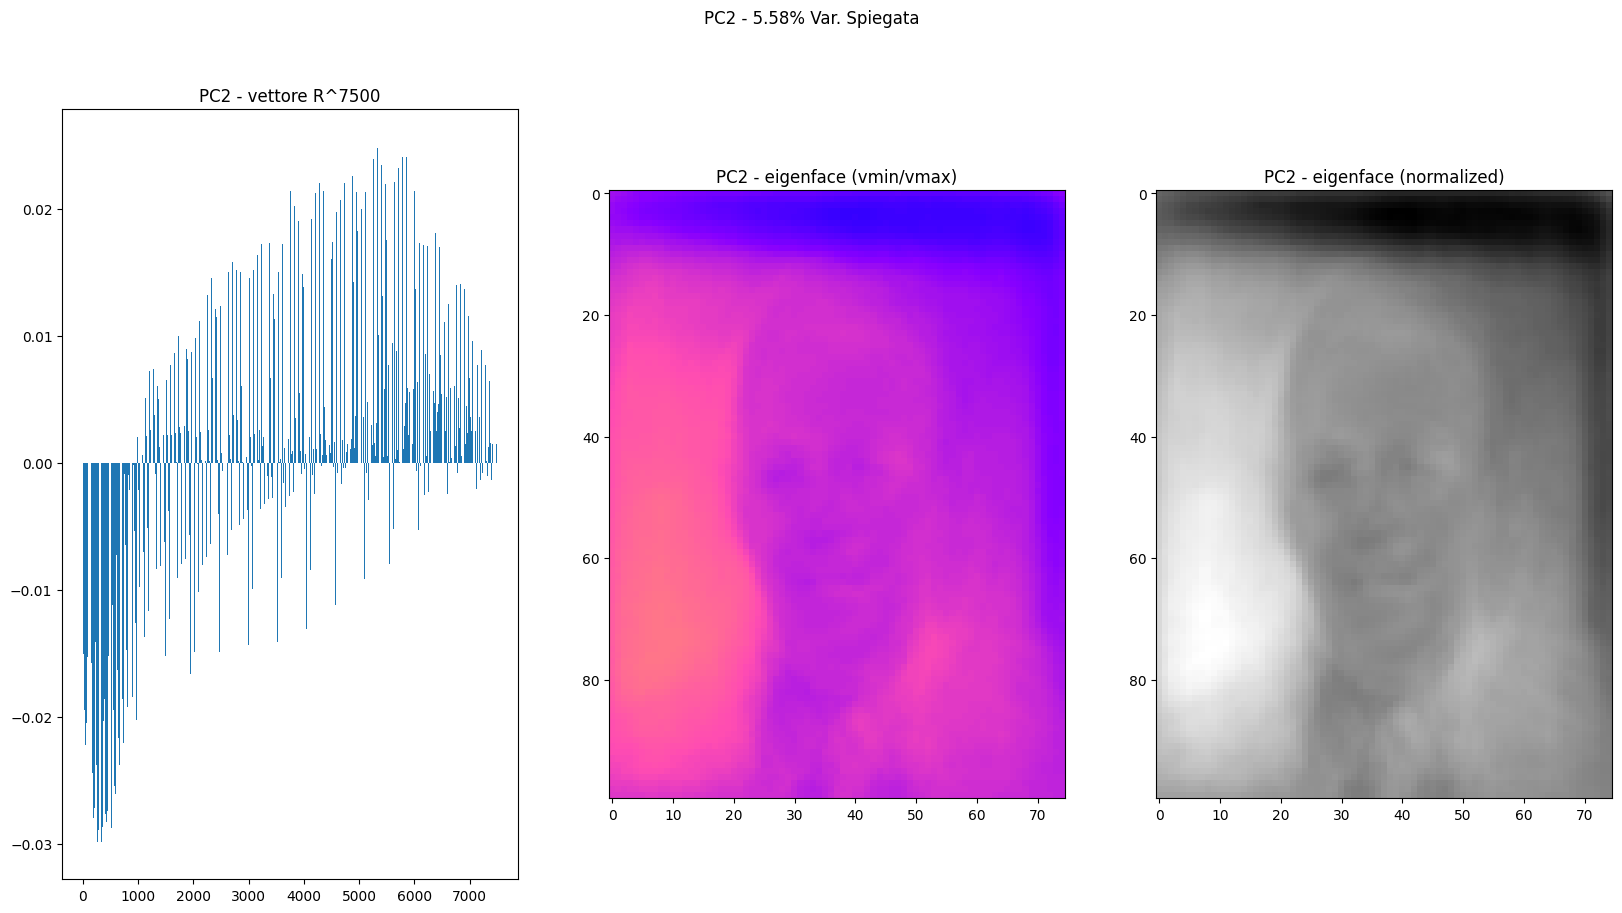

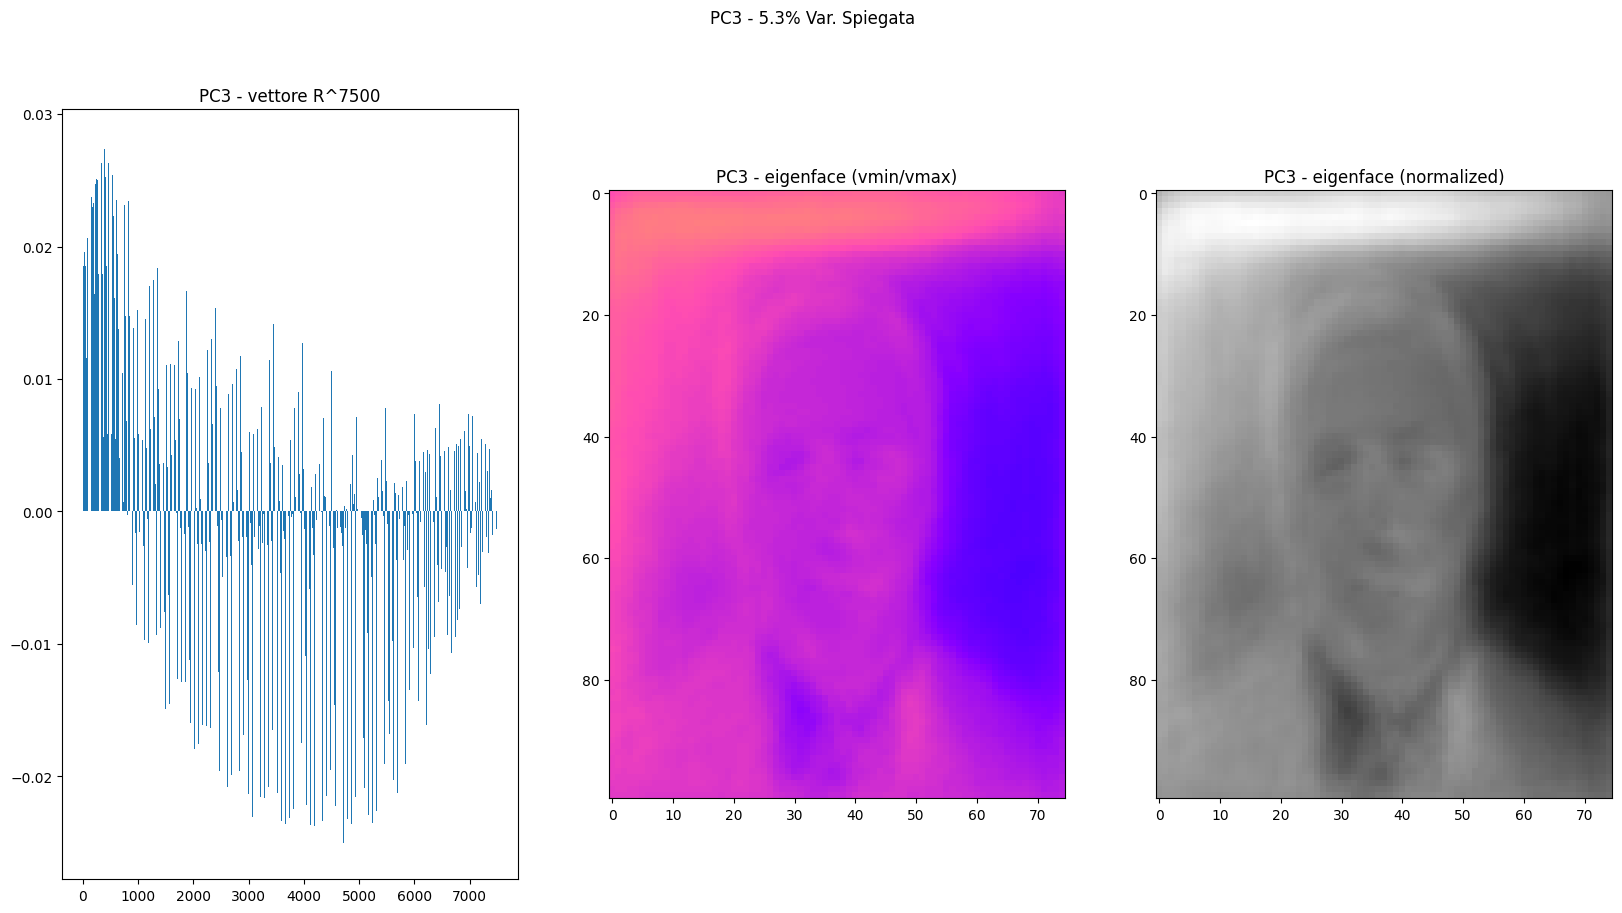

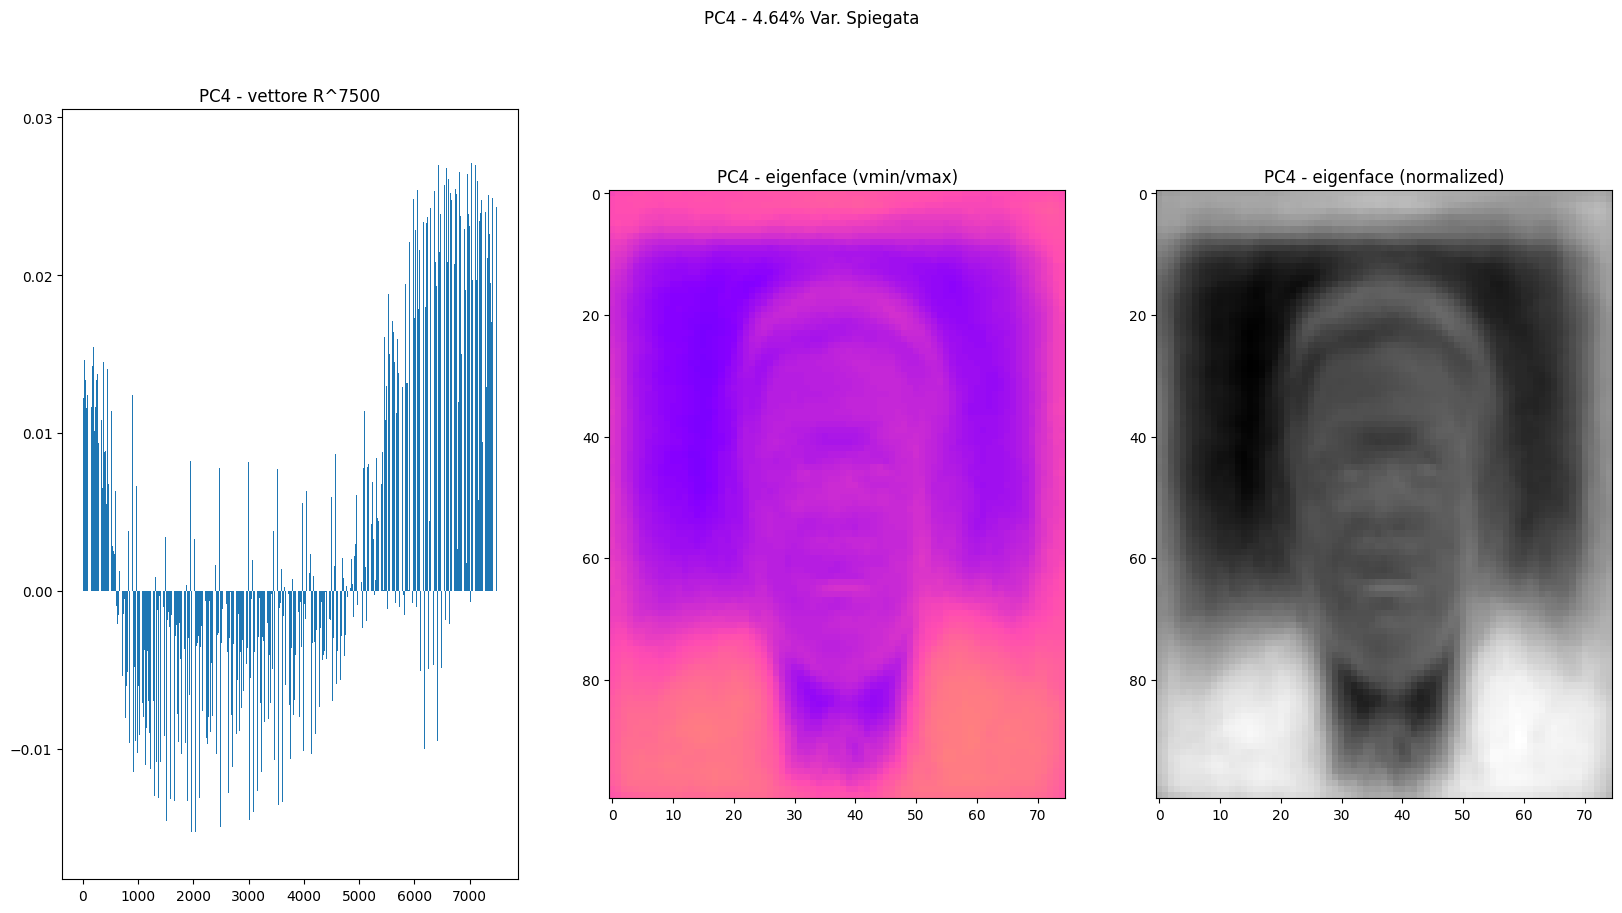

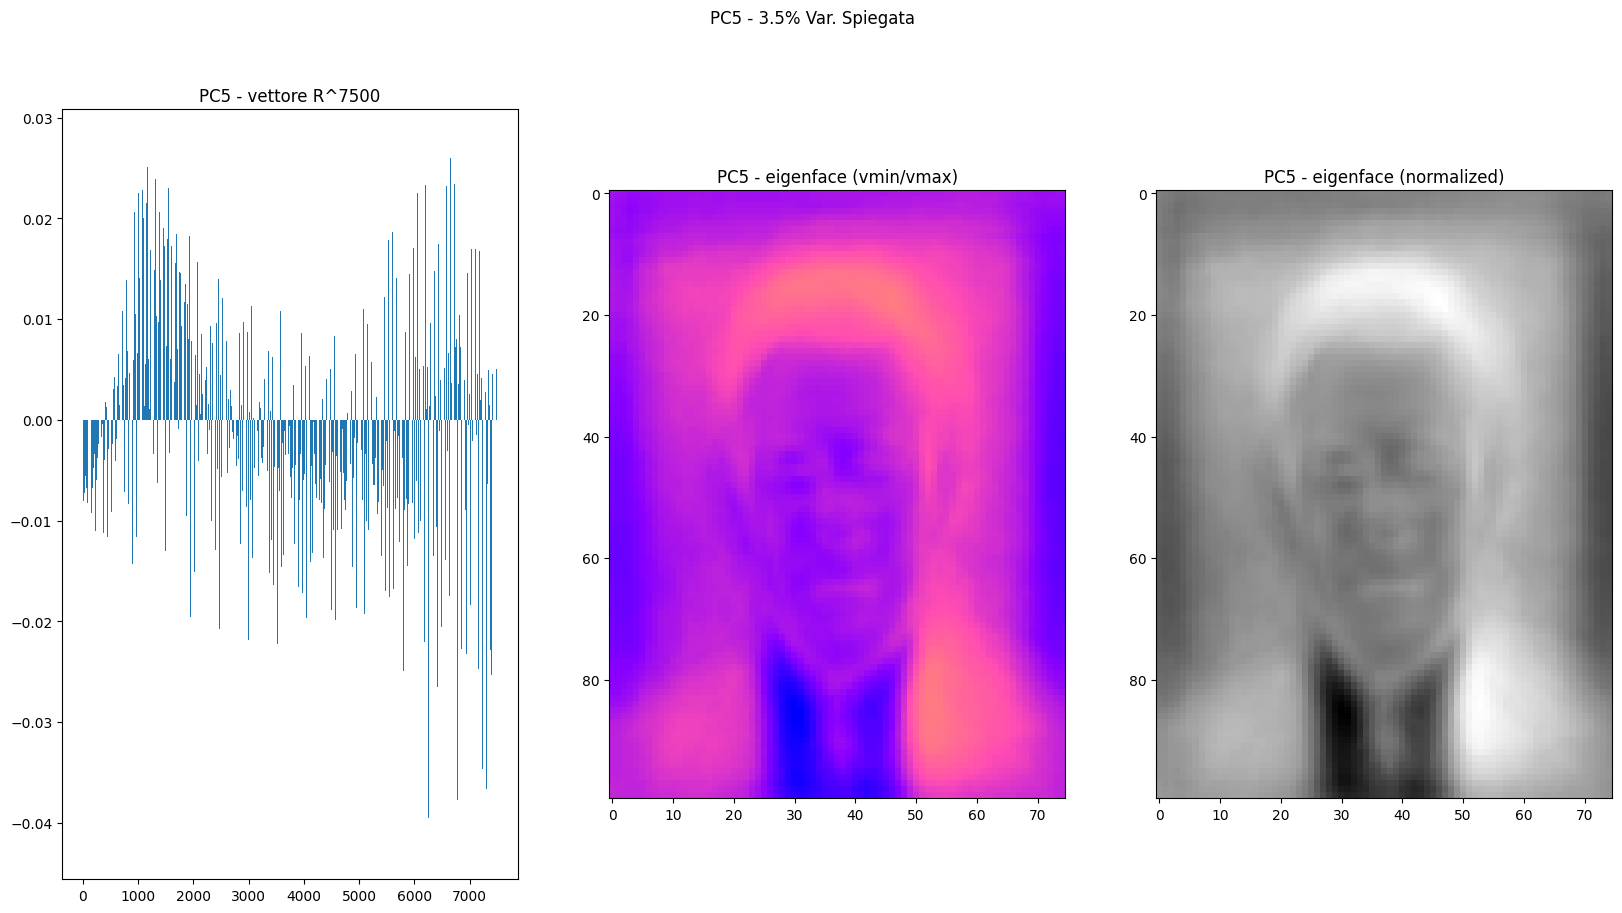

In [9]:
# Salviamo le PC "risistemate" come matrici/immagini in una lista apposita.

_, height, width = face_images.shape
eigenfaces = [pca.components_[i].reshape((height, width)) for i in range(pca.n_components_)]

vmin = pca.components_.min()
vmax = pca.components_.max()

vmin = min([vmin, -vmax, 0.0])
vmax = max([-vmin, vmax, 0.0])

print('vmin: {} (dark purple)'.format(vmin))
print('vmax: {} (yellow)'.format(vmax))

# Numero di Eigenfaces da visualizzare (non tutte per allegerire l'esecuzione dei plot)
n_pc_tosee = 5

for i in range(n_pc_tosee): 
    fig, axs = plt.subplots(1, 3, figsize=(20, 10))
    axs[0].bar(np.arange(pca.components_.shape[1]), pca.components_[i, :])
    axs[0].set_title('PC{} - vettore R^{}'.format(i + 1, pca.components_.shape[1]))
    
    axs[1].imshow(eigenfaces[i], cmap=plt.cm.gnuplot2, vmin=vmin, vmax=vmax)
    axs[1].set_title('PC{} - eigenface (vmin/vmax)'.format(i + 1, height, width))
    
    axs[2].imshow(eigenfaces[i], cmap=plt.cm.gray)
    axs[2].set_title('PC{} - eigenface (normalized)'.format(i + 1, height, width))
    
    fig.suptitle('PC{} - {}% Var. Spiegata'.format(i + 1, np.around(100 * pca.explained_variance_ratio_[i], decimals=2)))
    
    plt.show()


In [10]:
print(face_data.shape)
U, s, Vt = np.linalg.svd(face_data)
print(U.shape)
print(s.shape)
print(Vt.shape)


(1560, 7500)
(1560, 1560)
(1560,)
(7500, 7500)


In [11]:
n, p = face_data.shape
S = np.zeros((n, p), float)
np.fill_diagonal(S, np.asarray(s))
print(S.shape)

(1560, 7500)


True
(7500, 7500) (7500, 1560)


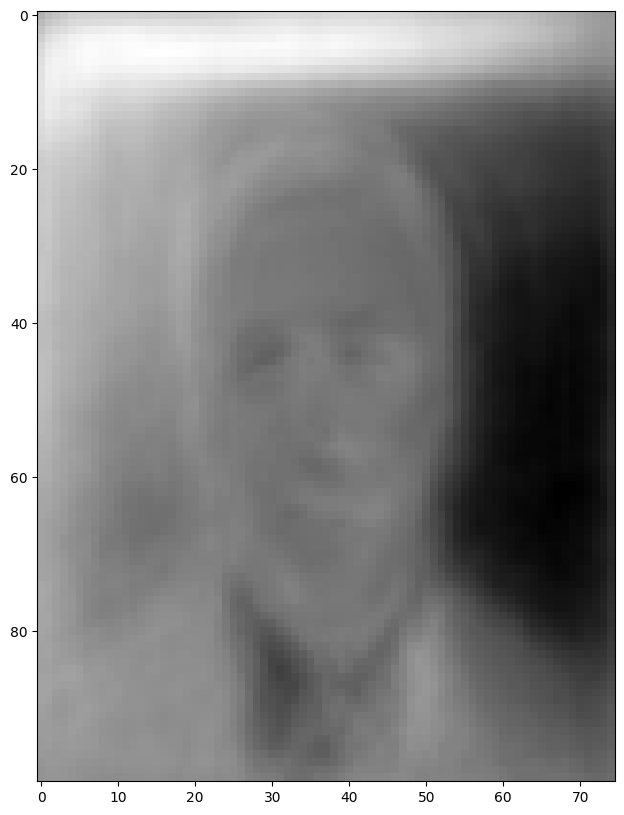

In [12]:
_, height, width = face_images.shape
my_pca = My_PCA()
my_pca.fit(face_data.T)

print(max(my_pca.s) == my_pca.s[0])

print(my_pca.U.shape, my_pca.S.shape)

eigenface = (my_pca.U)[:, 2]
eigenface = np.asarray(eigenface)
#eigenface = eigenface/np.linalg.norm(eigenface)
eigenface = eigenface.reshape(height, width)


fig, axs = plt.subplots(1, 1, figsize=(20, 10))
axs.imshow(eigenface, cmap=plt.cm.gray)

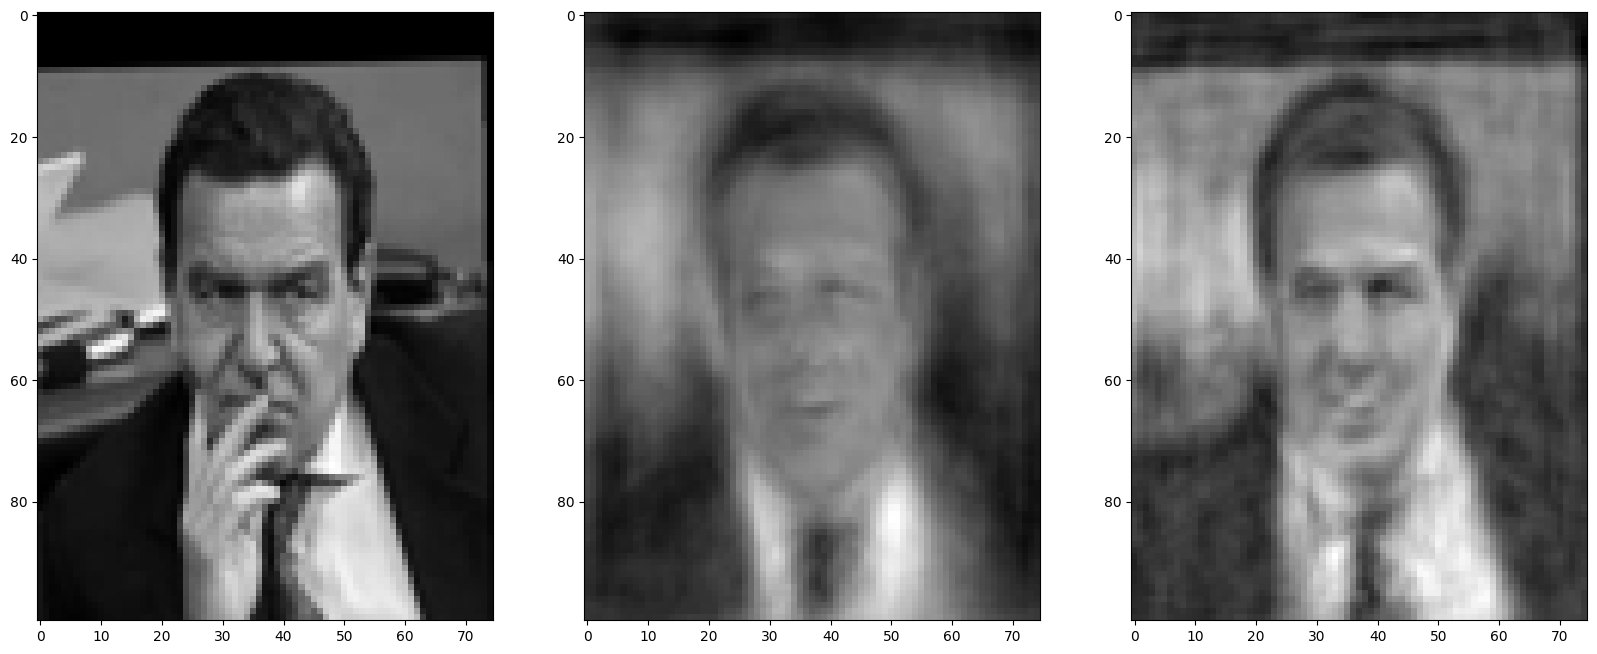

In [20]:
new_U = my_pca.U[:,0:40]
new_U_2 = my_pca.U[:,0:200]

face = face_data[1].T

mean_of_X = face_data.mean(axis=1).reshape((-1, 1))
#face = face - mean_of_X

face_transformed = (new_U.T).dot(face)
face_reconstruct = new_U.dot(face_transformed)

face_transformed_2 = (new_U_2.T).dot(face)
face_reconstruct_2 = new_U_2.dot(face_transformed_2)

face = face.reshape(height, width)
face_reconstruct = face_reconstruct.reshape(height, width)
face_reconstruct_2 = face_reconstruct_2.reshape(height, width)
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(face, cmap=plt.cm.gray)
axs[1].imshow(face_reconstruct, cmap=plt.cm.gray)
axs[2].imshow(face_reconstruct_2, cmap=plt.cm.gray)


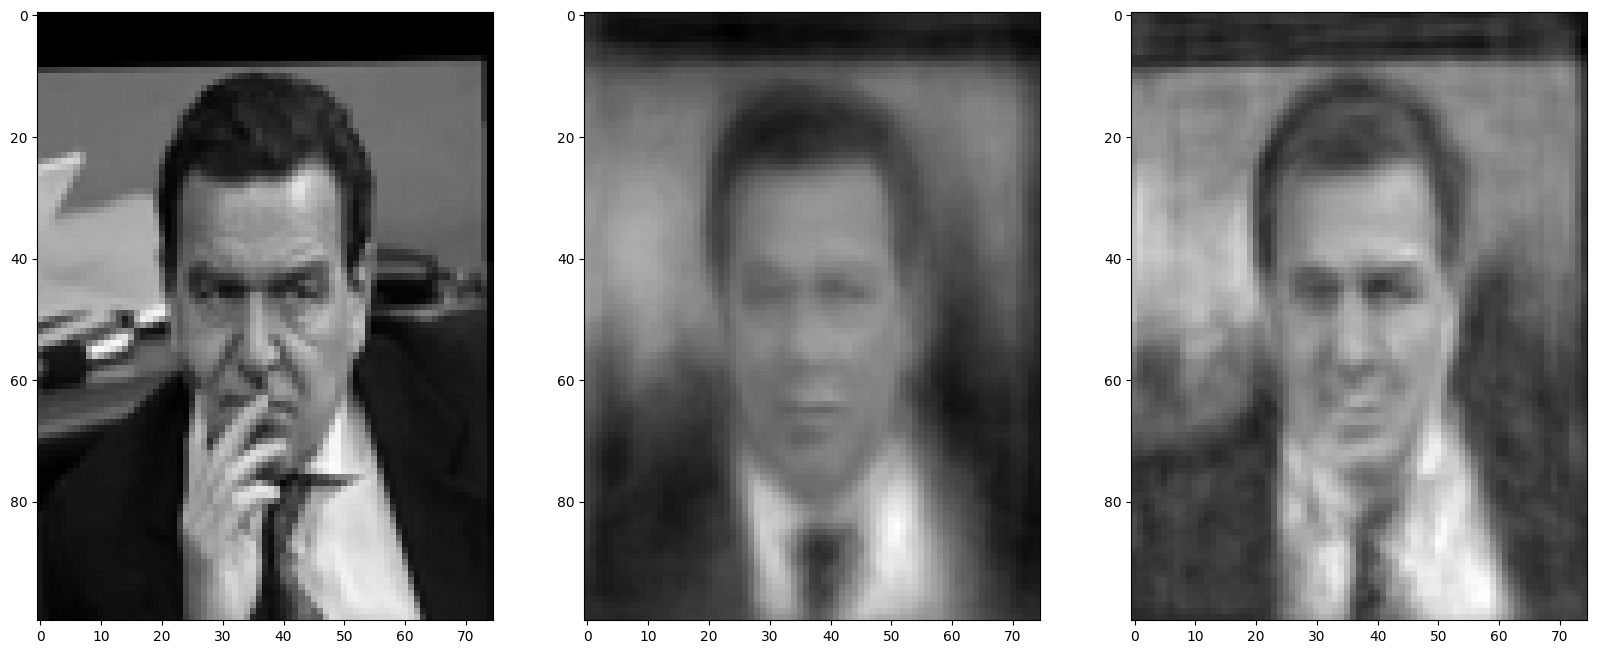

In [22]:
pca = PCA(40)
pca_2 = PCA(200)
n=1

pca_data = pca.fit_transform(face_data)
pca_data_2 = pca_2.fit_transform(face_data)

rec_data = pca.inverse_transform(pca_data[n])
rec_data_2 = pca_2.inverse_transform(pca_data_2[n])

face = face_images[n]
face_reconstruct = rec_data.reshape(height, width)
face_reconstruct_2 = rec_data_2.reshape(height, width)
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(face, cmap=plt.cm.gray)
axs[1].imshow(face_reconstruct, cmap=plt.cm.gray)
axs[2].imshow(face_reconstruct_2, cmap=plt.cm.gray)